The case study is from a dataset from Kaggle. 
Link to the Kaggle project site:
https://www.kaggle.com/c/plant-seedlings-classification


The dataset has to be downloaded from the above Kaggle web site.


Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

 
The points distribution for this case is as follows:
1. Read the images and generate the train and test dataset (5 points)
2. Divide the data set into Train and validation data sets
3. Initialize & build the model (10 points)
4. Optimize the model (5 points)
5. Predict the accuracy for both train and validation data (5 points)


***1. Read the images and generate the train and test dataset (5 points)***

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install kaggle

In [26]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [27]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [28]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [29]:
ls /content/.kaggle/

kaggle.json


In [0]:
import json
token = {"username":"vh2019","key":"308780deb39ecd8dfb5448aa5c3638ed"}
with open("/content/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)

In [31]:
ls /content/.kaggle/

kaggle.json


In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [34]:
!kaggle config set -n path -v{/content/drive}

- path is now set to: {/content/drive}


In [35]:
!kaggle competitions download -c plant-seedlings-classification -p /content/CNN_PLANT_SEEDLINGS

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 8.32MB/s]
 94% 81.0M/86.0M [00:02<00:00, 29.8MB/s]
100% 86.0M/86.0M [00:02<00:00, 41.6MB/s]
100% 1.59G/1.60G [00:33<00:00, 46.9MB/s]
100% 1.60G/1.60G [00:33<00:00, 50.7MB/s]


In [36]:
pwd

'/content'

In [0]:
import os
os.chdir('/content/CNN_PLANT_SEEDLINGS')

In [0]:
!unzip -q /content/CNN_PLANT_SEEDLINGS/train.zip -d /content/CNN_PLANT_SEEDLINGS/train/  #unzip data in train/

In [0]:
!unzip -q /content/CNN_PLANT_SEEDLINGS/test.zip -d /content/CNN_PLANT_SEEDLINGS/test/  #unzip data in test/

In [0]:
!unzip -q /content/CNN_PLANT_SEEDLINGS/sample_submission.csv.zip -d /content/CNN_PLANT_SEEDLINGS/csv/  #unzip data in csv/

In [41]:
import pandas as pd
d = pd.read_csv('/content/CNN_PLANT_SEEDLINGS/csv/sample_submission.csv')
d.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [42]:
d.count()

file       794
species    794
dtype: int64

ValueError: ignored

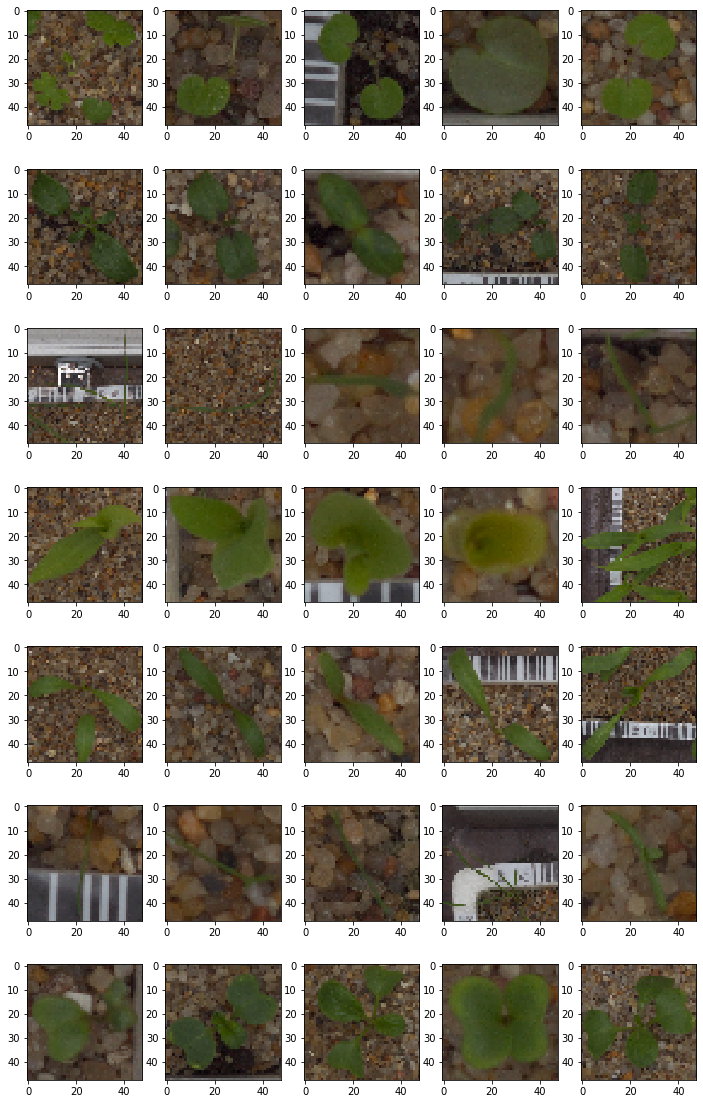

In [81]:
# input path for the images
from keras.preprocessing.image import load_img, img_to_array
# size of the image: 48*48 pixels
pic_size = 48
base_path = "/content/CNN_PLANT_SEEDLINGS/train/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

***2. Divide the data set into Train and validation data sets***

In [43]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from zipfile import ZipFile
import cv2
import os
import pandas
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
import skimage.io as io

Using TensorFlow backend.


In [0]:
x_test=[]
os.chdir('/content/CNN_PLANT_SEEDLINGS/test/test')
import cv2
for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(128,128))
    x_test.append(dummy)

In [0]:
x_train = []
y_train = []
os.chdir('/content/CNN_PLANT_SEEDLINGS/train/train')

In [46]:
os.listdir()

['Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Maize',
 'Sugar beet',
 'Loose Silky-bent',
 'Charlock',
 'Shepherds Purse',
 'Common wheat',
 'Scentless Mayweed',
 'Common Chickweed',
 'Fat Hen']

In [47]:
ls

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


In [48]:
x_train = []
y_train = []
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/CNN_PLANT_SEEDLINGS/train/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)

Small-flowered Cranesbill
Cleavers
Black-grass
Maize
Sugar beet
Loose Silky-bent
Charlock
Shepherds Purse
Common wheat
Scentless Mayweed
Common Chickweed
Fat Hen


In [49]:
x_train[0].shape

(128, 128, 3)

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)

In [0]:
encoded_labels = dum
y_train = dum

In [0]:
import numpy as np
y_train = np.array(y_train)

In [0]:
x_train = np.array(x_train)

In [54]:
x_train[0].shape

(128, 128, 3)

In [55]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

3800
950


In [56]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [0]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [59]:
print (x_train2.shape)
print (x_val.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [60]:
print(y_train2.shape)
print(y_val.shape)

(3800, 12)
(950, 12)


***3. Initialize & build the model (10 points)***

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, Flatten

In [0]:
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam

In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 12, activation = 'softmax')) 

In [65]:
Optimizer = adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 128)      

In [67]:
batch_size = 64
nb_epochs = 10
history = model.fit(x_train,y_train,
                    epochs=20, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4750 samples, validate on 950 samples
Epoch 1/20
4750/4750 [==============================] - 8s 2ms/step - loss: 1.9201 - acc: 0.3307 - val_loss: 1.5204 - val_acc: 0.4653
Epoch 2/20
4750/4750 [==============================] - 3s 729us/step - loss: 1.2779 - acc: 0.5573 - val_loss: 0.8511 - val_acc: 0.6968
Epoch 3/20
4750/4750 [==============================] - 3s 731us/step - loss: 0.8493 - acc: 0.7093 - val_loss: 0.8127 - val_acc: 0.6968
Epoch 4/20
4750/4750 [==============================] - 3s 731us/step - loss: 0.6198 - acc: 0.7863 - val_loss: 0.3997 - val_acc: 0.8684
Epoch 5/20
4750/4750 [==============================] - 3s 728us/step - loss: 0.4643 - acc: 0.8425 - val_loss: 0.3141 - val_acc: 0.8853
Epoch 6/20
4750/4750 [==============================] - 3s 730us/step - loss: 0.3499 - acc: 0.8775 - val_loss: 0.2990 - val_acc: 0.9021
Epoch 7/20
4750/4750 [=====================

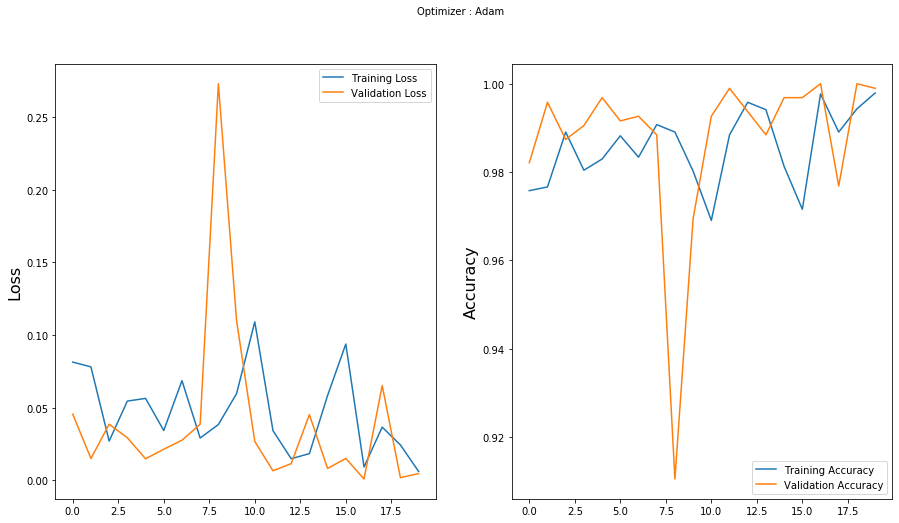

In [90]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

***4. Optimize the model (5 points)***

In [0]:
Optimizer = adam(lr=0.003)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [69]:
batch_size = 64
nb_epochs = 10
history = model.fit(x_train,y_train,
                    epochs=20, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 4750 samples, validate on 950 samples
Epoch 1/20
4750/4750 [==============================] - 4s 886us/step - loss: 0.0814 - acc: 0.9758 - val_loss: 0.0456 - val_acc: 0.9821
Epoch 2/20
4750/4750 [==============================] - 3s 725us/step - loss: 0.0781 - acc: 0.9766 - val_loss: 0.0151 - val_acc: 0.9958
Epoch 3/20
4750/4750 [==============================] - 3s 734us/step - loss: 0.0271 - acc: 0.9891 - val_loss: 0.0387 - val_acc: 0.9874
Epoch 4/20
4750/4750 [==============================] - 3s 732us/step - loss: 0.0546 - acc: 0.9804 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 5/20
4750/4750 [==============================] - 4s 738us/step - loss: 0.0565 - acc: 0.9829 - val_loss: 0.0149 - val_acc: 0.9968
Epoch 6/20
4750/4750 [==============================] - 3s 734us/step - loss: 0.0344 - acc: 0.9882 - val_loss: 0.0215 - val_acc: 0.9916
Epoch 7/20
4750/4750 [==============================] - 3s 729us/step - loss: 0.0687 - acc: 0.9834 - val_loss: 0.0277 - val_acc: 0.9926
E

In [0]:
#with change in learning rate, there is slight increase in accuracy

***5. Predict the accuracy for both train and validation data (5 points)***

In [93]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_val,y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.998, Test: 0.999
